## GlobalZone ##

![image-alt-text](imagens/model.fw.png)

<h4> Entendimento do Negócio </h4>
Fonte: https://www.kaggle.com/datasets/ddosad/datacamps-data-science-associate-certification </br>
Objetivo: construção de um modelo de machine learning para prever se um aluno comparecerá ou não na aula, para que em caso de ausência seja disponibilizado uma vaga. O projeto é para uma academia chamada GlobalZone que oferece aulas de ginástica em duas modalidades.

<h3> Obtenção dos Dados </h3>

In [50]:
# Importação de bibliotecas e pacotes
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from sklearn.model_selection import train_test_split

In [3]:
# Definição de métodos/funções
def carregar_dados():
    try:
        registros = pd.read_csv("bases/fitness_class_2212.csv")
    except Exception as e:
        print("Erro ao carregar a fonte de dados")
        print(e)
    else:
        print(f'Foram carregados {len(registros)} registros e {len(registros.columns)} colunas')
        return registros

In [4]:
registros = carregar_dados()

Foram carregados 1500 registros e 8 colunas


<h3> Análise Exploratória de Dados </h3>

In [5]:
registros

booking_id  months_as_member  weight days_before day_of_week time  \
0              1                17   79.56           8         Wed   PM   
1              2                10   79.01           2         Mon   AM   
2              3                16   74.53          14         Sun   AM   
3              4                 5   86.12          10         Fri   AM   
4              5                15   69.29           8         Thu   AM   
...          ...               ...     ...         ...         ...  ...   
1495        1496                21   79.51          10         Fri   AM   
1496        1497                29   89.55           2         Mon   AM   
1497        1498                 9   87.38           4         Tue   AM   
1498        1499                34   68.64          14         Sun   AM   
1499        1500                20   94.39           8         Thu   AM   

      category  attended  
0     Strength         0  
1         HIIT         0  
2     Strength         0  
3      Cycling         0  
4         HIIT         0  
...        ...       ...  
1495      HIIT         0  
1496  Strength         0  
1497      HIIT         0  
1498      Aqua         0  
1499   Cycling         1  

[1500 rows x 8 columns]

<h4> Número da reserva </h4>

In [15]:
registros['booking_id']

0          1
1          2
2          3
3          4
4          5
        ... 
1495    1496
1496    1497
1497    1498
1498    1499
1499    1500
Name: booking_id, Length: 1500, dtype: int64

In [16]:
print('Qtde de valores únicos: ',len(registros['booking_id'].unique()))

Qtde de valores únicos:  1500


In [17]:
registros['booking_id'].head(5)

0    1
1    2
2    3
3    4
4    5
Name: booking_id, dtype: int64

<h4> Meses como membro da academia </h4>

In [18]:
registros['months_as_member']

0       17
1       10
2       16
3        5
4       15
        ..
1495    21
1496    29
1497     9
1498    34
1499    20
Name: months_as_member, Length: 1500, dtype: int64

In [19]:
registros['months_as_member'].describe()

count    1500.000000
mean       15.628667
std        12.926543
min         1.000000
25%         8.000000
50%        12.000000
75%        19.000000
max       148.000000
Name: months_as_member, dtype: float64

Distribuição de Valores - Histograma de months_as_member


<Axes: >

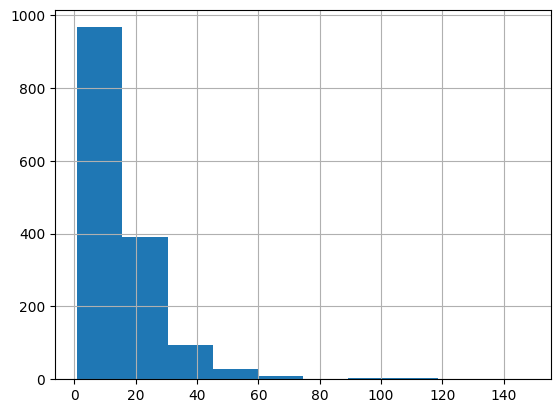

In [22]:
print("Distribuição de Valores - Histograma de months_as_member")
registros['months_as_member'].hist()

<h4> Peso do Associado </h4>

In [35]:
registros['weight']

0       79.56
1       79.01
2       74.53
3       86.12
4       69.29
        ...  
1495    79.51
1496    89.55
1497    87.38
1498    68.64
1499    94.39
Name: weight, Length: 1500, dtype: float64

In [36]:
registros['weight'].describe()

count    1480.000000
mean       82.610378
std        12.765859
min        55.410000
25%        73.490000
50%        80.760000
75%        89.520000
max       170.520000
Name: weight, dtype: float64

Distribuição de Valores - Histograma de weight


<Axes: >

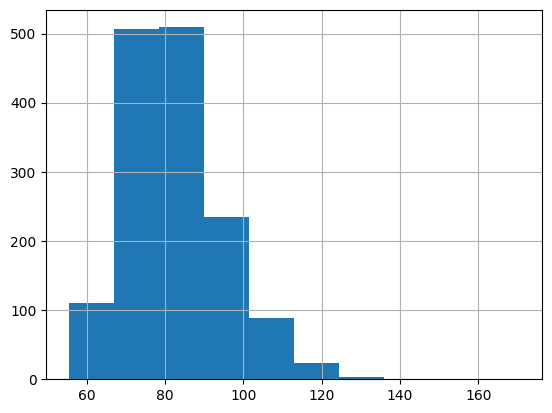

In [37]:
print("Distribuição de Valores - Histograma de weight")
registros['weight'].hist()

In [39]:
registros['weight'].head(10)

0    79.56
1    79.01
2    74.53
3    86.12
4    69.29
5    93.33
6    88.59
7    89.52
8    71.12
9    81.25
Name: weight, dtype: float64

<h4> Número de Dias Antes da Aula </h4>

In [40]:
registros['days_before']

0        8
1        2
2       14
3       10
4        8
        ..
1495    10
1496     2
1497     4
1498    14
1499     8
Name: days_before, Length: 1500, dtype: object

In [55]:
registros['days_before'].head(10)

0     8
1     2
2    14
3    10
4     8
5     2
6     6
7    10
8    10
9    10
Name: days_before, dtype: object

In [76]:
registros['days_before'].describe()

count     1500
unique      31
top         10
freq       293
Name: days_before, dtype: object

In [77]:
# Convertendo para inteiro
registros['days_before'] = registros['days_before'].astype(int)
registros['days_before'].describe()

ValueError: invalid literal for int() with base 10: '12 days'

In [78]:
def transformar_string(string):
    return string[0:2]

In [79]:
# Removendo espaços 
registros['days_before'] = registros['days_before'].apply(transformar_string())

TypeError: transformar_string() missing 1 required positional argument: 'string'

In [72]:
# Convertendo para inteiro, tentando novamente
registros['days_before'] = registros['days_before'].astype(int)
registros['days_before'].describe()

ValueError: invalid literal for int() with base 10: '12 days'

<h4> Contagem de Valores Ausentes </h4>

In [45]:
registros.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

<h4> O Dia da Semana da Aula </h4>

In [94]:
registros['day_of_week']

0       Wed
1       Mon
2       Sun
3       Fri
4       Thu
       ... 
1495    Fri
1496    Mon
1497    Tue
1498    Sun
1499    Thu
Name: day_of_week, Length: 1500, dtype: object

In [95]:
registros['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

In [96]:
print(f"Qtde de valores distintos {registros['day_of_week'].nunique()}")

Qtde de valores distintos 10


In [59]:
# Correção de strings
registros['day_of_week'] = registros['day_of_week'].replace("Fri.","Fri")
registros['day_of_week'] = registros['day_of_week'].replace("Monday","Mon")
registros['day_of_week'] = registros['day_of_week'].replace("Wednesday","Wed")

In [60]:
print(f"Qtde de valores distintos {registros['day_of_week'].nunique()}")

Qtde de valores distintos 7


In [61]:
registros['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Tue', 'Sat'], dtype=object)

In [62]:
registros.groupby(['day_of_week']).count()

booking_id  months_as_member  weight  days_before  time  \
day_of_week                                                            
Fri                 305               305     305          305   305   
Mon                 228               228     228          228   228   
Sat                 202               202     202          202   202   
Sun                 213               213     213          213   213   
Thu                 241               241     241          241   241   
Tue                 195               195     195          195   195   
Wed                 116               116     116          116   116   

             category  attended  
day_of_week                      
Fri               305       305  
Mon               228       228  
Sat               202       202  
Sun               213       213  
Thu               241       241  
Tue               195       195  
Wed               116       116

<h4> Tempo (período: diurno ou noturno) </h4>

In [6]:
registros['time'].head(5)

0    PM
1    AM
2    AM
3    AM
4    AM
Name: time, dtype: object

In [9]:
print(f"Qtde de valores DISTINTOS {registros['time'].nunique()}")
print(f"Valores DISTINTOS de TEMPO: {registros['time'].unique()}")

Qtde de valores DISTINTOS 2
Valores DISTINTOS de TEMPO: ['PM' 'AM']


In [10]:
# Contando a quantidade de registros para cada PERÍODO
registros.groupby(['time']).count()

booking_id  months_as_member  weight  days_before  day_of_week  \
time                                                                   
AM          1141              1141    1130         1141         1141   
PM           359               359     350          359          359   

      category  attended  
time                      
AM        1141      1141  
PM         359       359

In [12]:
# Quantidade de registros totais
registros.shape

(1500, 8)

In [13]:
1141/1500

0.7606666666666667

In [14]:
359/1500

0.23933333333333334

<h4> Categoria  </h4>

In [18]:
print(f"Qtde de valores DISTINTOS {registros['category'].nunique()}")
registros['category'].unique()

Qtde de valores DISTINTOS 6


array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

In [15]:
registros['category'].head(5)

0    Strength
1        HIIT
2    Strength
3     Cycling
4        HIIT
Name: category, dtype: object

In [29]:
registros.groupby(['category']).count()['booking_id']

category
-            13
Aqua         76
Cycling     376
HIIT        667
Strength    233
Yoga        135
Name: booking_id, dtype: int64

In [26]:
registros['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

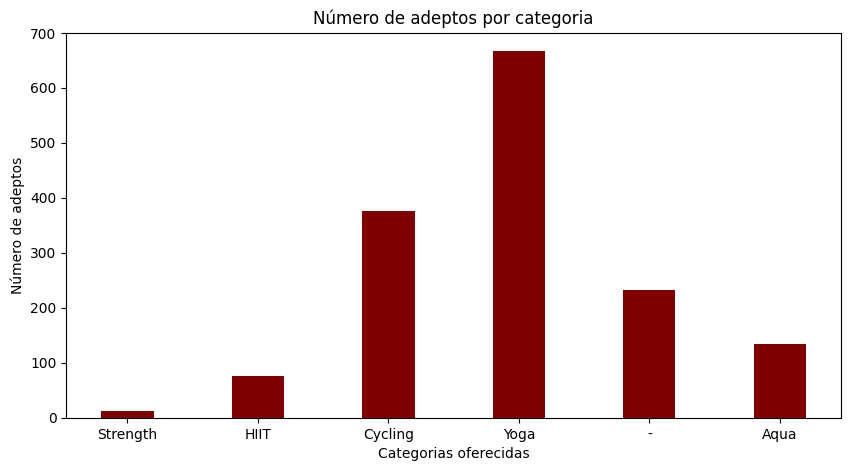

In [31]:
fig = plt.figure(figsize = (10, 5))
categorias = registros['category'].unique()
values = registros.groupby(['category']).count()['booking_id']

# creating the bar plot
plt.bar(categorias, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Categorias oferecidas")
plt.ylabel("Número de adeptos")
plt.title("Número de adeptos por categoria")
plt.show()

<h4> Comparecimento ou não do aluno (LABEL) </h4>

In [32]:
registros['attended']

0       0
1       0
2       0
3       0
4       0
       ..
1495    0
1496    0
1497    0
1498    0
1499    1
Name: attended, Length: 1500, dtype: int64

In [33]:
registros.groupby(['attended']).count()['booking_id']

attended
0    1046
1     454
Name: booking_id, dtype: int64

In [38]:
# Contabilizando
# Note que temos um DESBALANÇEAMENTO
total = len(registros)
print(f"% Qtde de ALUNOS que NÃO COMPARECERAM {len(registros[registros.attended == 0])/total * 100} ")
print(f"% Qtde de ALUNOS que COMPARECERAM {len(registros[registros.attended == 1])/total * 100} ")

% Qtde de ALUNOS que NÃO COMPARECERAM 69.73333333333333 
% Qtde de ALUNOS que COMPARECERAM 30.266666666666666 


<h4> Tratamento das variáveis ausentes </h4>

In [ ]:
# Remover a linha inteira onde tem
# Remover a coluna inteira onde tem
# Fazer imputação de valores como, por exemplo, média, máximo ...

In [89]:
registros_sem_nulos = registros.dropna()
peso_medio = st.mean(registros_sem_nulos['weight'])
print(peso_medio)

82.61037837837839


In [90]:
registros['weight'] = registros['weight'].fillna(peso_medio)
print('Imputação feita')

Imputação feita


<h4> Tratamento das Variáveis Categóricas </h4>

In [52]:
registros.head(5)

booking_id  months_as_member  weight days_before day_of_week time  \
0           1                17   79.56           8         Wed   PM   
1           2                10   79.01           2         Mon   AM   
2           3                16   74.53          14         Sun   AM   
3           4                 5   86.12          10         Fri   AM   
4           5                15   69.29           8         Thu   AM   

   category  attended  
0  Strength         0  
1      HIIT         0  
2  Strength         0  
3   Cycling         0  
4      HIIT         0

In [91]:
# Tratamento One Hot Encoder
day_of_week_categorica = pd.get_dummies(registros['day_of_week'])
day_of_week_categorica

Fri    Mon    Sat    Sun    Thu    Tue    Wed
0     False  False  False  False  False  False   True
1     False   True  False  False  False  False  False
2     False  False  False   True  False  False  False
3      True  False  False  False  False  False  False
4     False  False  False  False   True  False  False
...     ...    ...    ...    ...    ...    ...    ...
1495   True  False  False  False  False  False  False
1496  False   True  False  False  False  False  False
1497  False  False  False  False  False   True  False
1498  False  False  False   True  False  False  False
1499  False  False  False  False   True  False  False

[1500 rows x 7 columns]

In [92]:
# Tratamento ORDINAL ENCODER
registros['time_cat'] = registros['time'].replace('AM',1)
registros['time_cat'] = registros['time_cat'].replace('PM',2)
registros['time_cat']

0       2
1       1
2       1
3       1
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    1
Name: time_cat, Length: 1500, dtype: int64

In [93]:
# Tratamento One Hot Encoder
day_of_time_categorica = pd.get_dummies(registros['time'])
day_of_time_categorica

AM     PM
0     False   True
1      True  False
2      True  False
3      True  False
4      True  False
...     ...    ...
1495   True  False
1496   True  False
1497   True  False
1498   True  False
1499   True  False

[1500 rows x 2 columns]

In [94]:
# Tratamento One Hot Encoder
time_categorica = pd.get_dummies(registros['time'])
time_categorica

AM     PM
0     False   True
1      True  False
2      True  False
3      True  False
4      True  False
...     ...    ...
1495   True  False
1496   True  False
1497   True  False
1498   True  False
1499   True  False

[1500 rows x 2 columns]

In [95]:
# Tratamento One Hot Encoder
category_categorica = pd.get_dummies(registros['category'])
category_categorica

-   Aqua  Cycling   HIIT  Strength   Yoga
0     False  False    False  False      True  False
1     False  False    False   True     False  False
2     False  False    False  False      True  False
3     False  False     True  False     False  False
4     False  False    False   True     False  False
...     ...    ...      ...    ...       ...    ...
1495  False  False    False   True     False  False
1496  False  False    False  False      True  False
1497  False  False    False   True     False  False
1498  False   True    False  False     False  False
1499  False  False     True  False     False  False

[1500 rows x 6 columns]

In [96]:
# Unindo TODOS
categoricas = pd.concat([day_of_week_categorica,day_of_time_categorica,category_categorica],axis = 1)
categoricas

Fri    Mon    Sat    Sun    Thu    Tue    Wed     AM     PM      -  \
0     False  False  False  False  False  False   True  False   True  False   
1     False   True  False  False  False  False  False   True  False  False   
2     False  False  False   True  False  False  False   True  False  False   
3      True  False  False  False  False  False  False   True  False  False   
4     False  False  False  False   True  False  False   True  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1495   True  False  False  False  False  False  False   True  False  False   
1496  False   True  False  False  False  False  False   True  False  False   
1497  False  False  False  False  False   True  False   True  False  False   
1498  False  False  False   True  False  False  False   True  False  False   
1499  False  False  False  False   True  False  False   True  False  False   

       Aqua  Cycling   HIIT  Strength   Yoga  
0     False    False  False      True  False  
1     False    False   True     False  False  
2     False    False  False      True  False  
3     False     True  False     False  False  
4     False    False   True     False  False  
...     ...      ...    ...       ...    ...  
1495  False    False   True     False  False  
1496  False    False  False      True  False  
1497  False    False   True     False  False  
1498   True    False  False     False  False  
1499  False     True  False     False  False  

[1500 rows x 15 columns]

In [97]:
registros.head(5)

booking_id  months_as_member  weight days_before day_of_week time  \
0           1                17   79.56           8         Wed   PM   
1           2                10   79.01           2         Mon   AM   
2           3                16   74.53          14         Sun   AM   
3           4                 5   86.12          10         Fri   AM   
4           5                15   69.29           8         Thu   AM   

   category  attended  time_cat  
0  Strength         0         2  
1      HIIT         0         1  
2  Strength         0         1  
3   Cycling         0         1  
4      HIIT         0         1

In [98]:
# Demais varíaveis
numericas = registros[['months_as_member','weight','days_before','attended']]
registros_tratado = pd.concat([categoricas,numericas],axis = 1)
registros_tratado

Fri    Mon    Sat    Sun    Thu    Tue    Wed     AM     PM      -  \
0     False  False  False  False  False  False   True  False   True  False   
1     False   True  False  False  False  False  False   True  False  False   
2     False  False  False   True  False  False  False   True  False  False   
3      True  False  False  False  False  False  False   True  False  False   
4     False  False  False  False   True  False  False   True  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1495   True  False  False  False  False  False  False   True  False  False   
1496  False   True  False  False  False  False  False   True  False  False   
1497  False  False  False  False  False   True  False   True  False  False   
1498  False  False  False   True  False  False  False   True  False  False   
1499  False  False  False  False   True  False  False   True  False  False   

       Aqua  Cycling   HIIT  Strength   Yoga  months_as_member  weight  \
0     False    False  False      True  False                17   79.56   
1     False    False   True     False  False                10   79.01   
2     False    False  False      True  False                16   74.53   
3     False     True  False     False  False                 5   86.12   
4     False    False   True     False  False                15   69.29   
...     ...      ...    ...       ...    ...               ...     ...   
1495  False    False   True     False  False                21   79.51   
1496  False    False  False      True  False                29   89.55   
1497  False    False   True     False  False                 9   87.38   
1498   True    False  False     False  False                34   68.64   
1499  False     True  False     False  False                20   94.39   

     days_before  attended  
0              8         0  
1              2         0  
2             14         0  
3             10         0  
4              8         0  
...          ...       ...  
1495          10         0  
1496           2         0  
1497           4         0  
1498          14         0  
1499           8         1  

[1500 rows x 19 columns]

In [99]:
len(registros_tratado)

1500

<h4> Orgazinação de FEATURES e LABELS </h4>

In [100]:
registros_tratado.columns

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'AM', 'PM', '-',
       'Aqua', 'Cycling', 'HIIT', 'Strength', 'Yoga', 'months_as_member',
       'weight', 'days_before', 'attended'],
      dtype='object')

In [101]:
# Não usaremos variáveis IDENTIFICADORES, ALTA CARDINALIDADE
X = registros_tratado[['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'AM', 'PM', '-',
       'Aqua', 'Cycling', 'HIIT', 'Strength', 'Yoga', 'months_as_member',
       'weight', 'days_before']]
Y = registros_tratado[['attended']]

In [102]:
X

Fri    Mon    Sat    Sun    Thu    Tue    Wed     AM     PM      -  \
0     False  False  False  False  False  False   True  False   True  False   
1     False   True  False  False  False  False  False   True  False  False   
2     False  False  False   True  False  False  False   True  False  False   
3      True  False  False  False  False  False  False   True  False  False   
4     False  False  False  False   True  False  False   True  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1495   True  False  False  False  False  False  False   True  False  False   
1496  False   True  False  False  False  False  False   True  False  False   
1497  False  False  False  False  False   True  False   True  False  False   
1498  False  False  False   True  False  False  False   True  False  False   
1499  False  False  False  False   True  False  False   True  False  False   

       Aqua  Cycling   HIIT  Strength   Yoga  months_as_member  weight  \
0     False    False  False      True  False                17   79.56   
1     False    False   True     False  False                10   79.01   
2     False    False  False      True  False                16   74.53   
3     False     True  False     False  False                 5   86.12   
4     False    False   True     False  False                15   69.29   
...     ...      ...    ...       ...    ...               ...     ...   
1495  False    False   True     False  False                21   79.51   
1496  False    False  False      True  False                29   89.55   
1497  False    False   True     False  False                 9   87.38   
1498   True    False  False     False  False                34   68.64   
1499  False     True  False     False  False                20   94.39   

     days_before  
0              8  
1              2  
2             14  
3             10  
4              8  
...          ...  
1495          10  
1496           2  
1497           4  
1498          14  
1499           8  

[1500 rows x 18 columns]

In [103]:
Y

attended
0            0
1            0
2            0
3            0
4            0
...        ...
1495         0
1496         0
1497         0
1498         0
1499         1

[1500 rows x 1 columns]

<h4> Divisão entre Dados de TREINO e TESTE</h4>

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state = 12)

In [107]:
# Contabilidade
print(f"Qtde de dados para o TREINAMENTO {len(X_train)}")
print(f"Qtde de dados para o TESTE {len(X_test)}")
# 1050/1500 = 0,7
# 450/1500 = 0,3

Qtde de dados para o TREINAMENTO 1050
Qtde de dados para o TESTE 450


In [108]:
X_test

Fri    Mon    Sat    Sun    Thu    Tue    Wed     AM     PM      -  \
1160   True  False  False  False  False  False  False   True  False  False   
667    True  False  False  False  False  False  False   True  False  False   
949   False  False  False   True  False  False  False   True  False  False   
1243   True  False  False  False  False  False  False   True  False  False   
101   False  False   True  False  False  False  False   True  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
884   False  False  False  False  False  False   True  False   True  False   
474    True  False  False  False  False  False  False   True  False  False   
67    False  False  False   True  False  False  False  False   True  False   
3      True  False  False  False  False  False  False   True  False  False   
1424   True  False  False  False  False  False  False   True  False  False   

       Aqua  Cycling   HIIT  Strength   Yoga  months_as_member  weight  \
1160  False    False  False     False   True                33   70.46   
667   False    False   True     False  False                12   78.39   
949   False    False  False     False   True                11   66.38   
1243  False     True  False     False  False                23   88.97   
101   False    False  False      True  False                 7   84.72   
...     ...      ...    ...       ...    ...               ...     ...   
884   False     True  False     False  False                18   87.70   
474   False    False  False      True  False                24   75.74   
67    False    False  False      True  False                 8   72.63   
3     False     True  False     False  False                 5   86.12   
1424  False    False  False      True  False                 4   88.08   

     days_before  
1160          10  
667           10  
949           15  
1243          10  
101           12  
...          ...  
884            7  
474           10  
67            14  
3             10  
1424          10  

[450 rows x 18 columns]

In [109]:
y_train

attended
1159         1
1002         0
1000         0
1493         0
863          0
...        ...
432          1
1283         1
1265         0
1277         0
1414         1

[1050 rows x 1 columns]

In [110]:
X_test

Fri    Mon    Sat    Sun    Thu    Tue    Wed     AM     PM      -  \
1160   True  False  False  False  False  False  False   True  False  False   
667    True  False  False  False  False  False  False   True  False  False   
949   False  False  False   True  False  False  False   True  False  False   
1243   True  False  False  False  False  False  False   True  False  False   
101   False  False   True  False  False  False  False   True  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
884   False  False  False  False  False  False   True  False   True  False   
474    True  False  False  False  False  False  False   True  False  False   
67    False  False  False   True  False  False  False  False   True  False   
3      True  False  False  False  False  False  False   True  False  False   
1424   True  False  False  False  False  False  False   True  False  False   

       Aqua  Cycling   HIIT  Strength   Yoga  months_as_member  weight  \
1160  False    False  False     False   True                33   70.46   
667   False    False   True     False  False                12   78.39   
949   False    False  False     False   True                11   66.38   
1243  False     True  False     False  False                23   88.97   
101   False    False  False      True  False                 7   84.72   
...     ...      ...    ...       ...    ...               ...     ...   
884   False     True  False     False  False                18   87.70   
474   False    False  False      True  False                24   75.74   
67    False    False  False      True  False                 8   72.63   
3     False     True  False     False  False                 5   86.12   
1424  False    False  False      True  False                 4   88.08   

     days_before  
1160          10  
667           10  
949           15  
1243          10  
101           12  
...          ...  
884            7  
474           10  
67            14  
3             10  
1424          10  

[450 rows x 18 columns]

In [111]:
y_test

attended
1160         1
667          1
949          0
1243         0
101          0
...        ...
884          0
474          0
67           1
3            0
1424         0

[450 rows x 1 columns]

<h4> Construção do Modelo Preditivo </h4>